### [Source](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb)

In [114]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# data
inp_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                    7.042,10.791,5.313,7.997,5.654,9.27,3.1])
label_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                      2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = inp_X.shape[0]

In [116]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [117]:
# variables
w = tf.Variable(.003, tf.float32)
b = tf.Variable(-0.4, tf.float32)

In [118]:
# input place holder
x = tf.placeholder(tf.float32)

# label place holder
label = tf.placeholder(tf.float32)

In [119]:
# model
model = w * x + b

In [120]:
# loss
loss = tf.reduce_sum(tf.pow(model-label, 2))/(2*n_samples)

In [121]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [122]:
# add the all the variables wish to be recorde
tf.summary.scalar("train_loss", loss)
tf.summary.histogram("weigts", w)
tf.summary.histogram("bias", b)

<tf.Tensor 'bias:0' shape=() dtype=string>

In [123]:
# initialize the variables
init = tf.global_variables_initializer()

Optimization Finished!
Training cost= 0.084029816


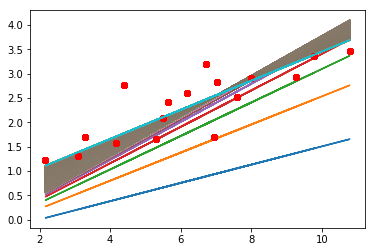

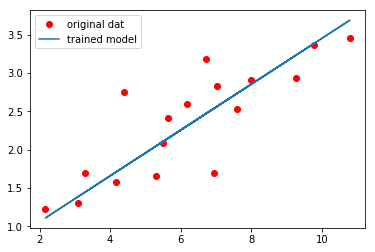

In [124]:
# training
with tf.Session() as sess:
    # summary writer for TensorBoard
    writer = tf.summary.FileWriter("./log_graph", sess.graph)    
    # run init
    sess.run(init)
    # train model
    for epoch in range(training_epochs):
        sess.run(optimizer, {x:inp_X, label:label_Y})
        train_loss = sess.run(loss, feed_dict={x:inp_X, label:label_Y})
        #print('epoch: {}, loss: {}'.format(epoch, train_loss))
        
        # live ploting the training
        plt.plot(inp_X, label_Y, 'ro', label="original dat")
        plt.plot(inp_X, sess.run(model, {x:inp_X}), label="trained model")
        #plt.legend()
        #plt.show()
        
    # close the graph
    summary_op = tf.summary.merge_all()
    writer.close()
        
    print ("Optimization Finished!")
    training_cost = sess.run(loss, feed_dict={x: inp_X, label: label_Y})
    print ("Training cost=", training_cost)
    
    # final result plot
    plt.show()
    plt.plot(inp_X, label_Y, 'ro', label="original dat")
    plt.plot(inp_X, sess.run(model, {x:inp_X}), label="trained model")
    plt.legend()